In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

Saving train.csv to train.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQ

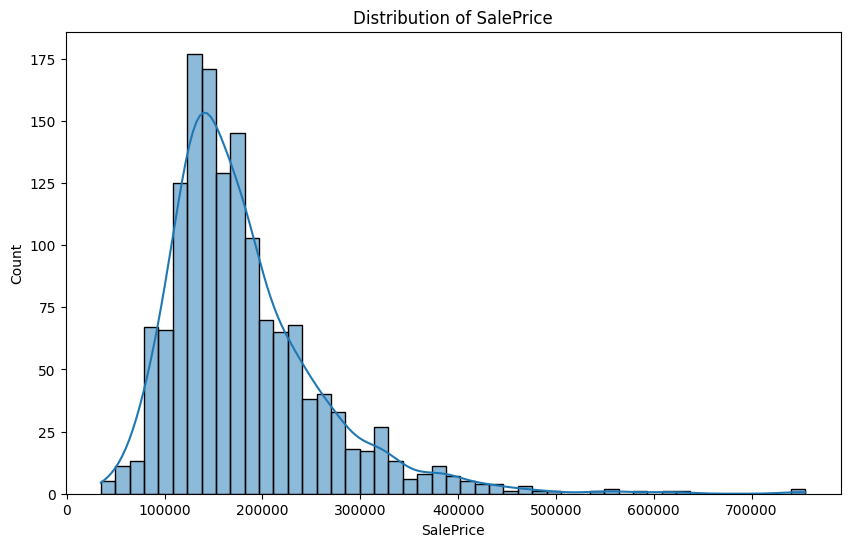

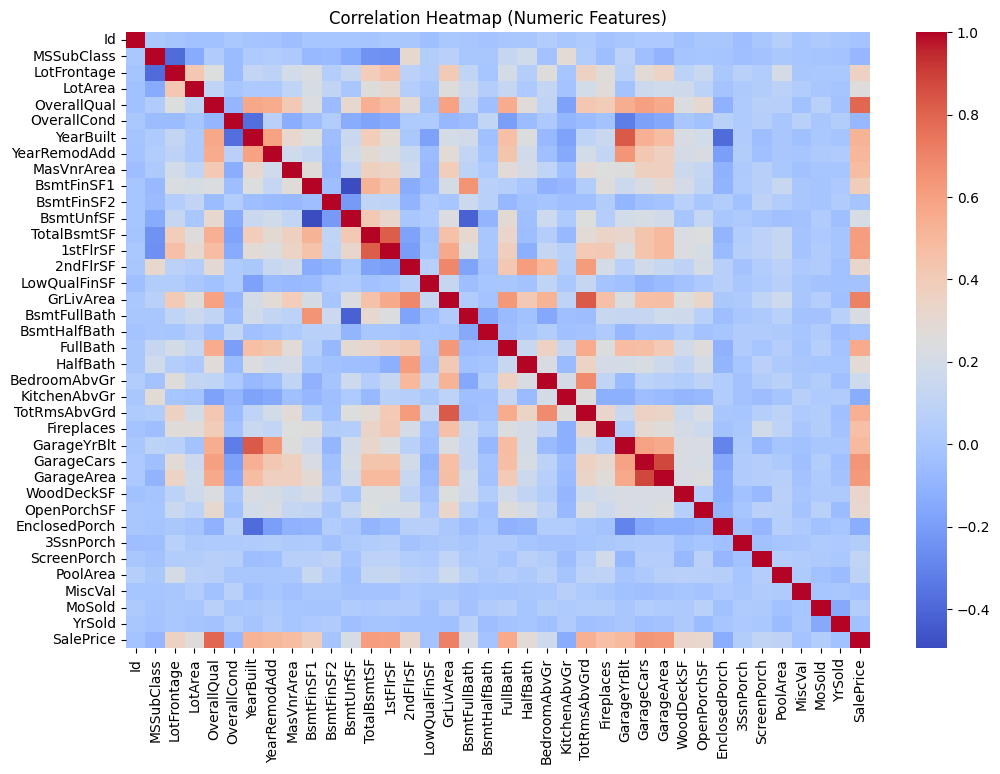

RMSE: 29285.518968142213
R² Score: 0.8881870733959393


In [2]:
# House Price Prediction using Random Forest Regressor

# Import  libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt  # For manual RMSE calculation

# Load the dataset
def load_data():
    # Load the dataset
    from google.colab import files
    uploaded = files.upload()

    # Assuming the file is named 'train.csv'
    data = pd.read_csv('train.csv')
    return data

# Preprocess the data
def preprocess_data(data):
    # Separate features and target
    X = data.drop('SalePrice', axis=1)
    y = data['SalePrice']

    # Define categorical and numerical features
    categorical_features = X.select_dtypes(include=['object']).columns
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing for numerical data
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
        ('scaler', StandardScaler())                 # Scale numerical features
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
        ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, preprocessor

# Train the model
def train_model(X_train, X_test, y_train, y_test, preprocessor):
    # Create a pipeline with preprocessing and model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    rmse = sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R² Score

    print(f"RMSE: {rmse}")
    print(f"R² Score: {r2}")

    return model

# Exploratory Data Analysis (EDA)
def perform_eda(data):
    # Display basic information
    print("Dataset Info:")
    print(data.info())
    print("\nDataset Description:")
    print(data.describe())

    # Visualize the distribution of SalePrice
    plt.figure(figsize=(10, 6))
    sns.histplot(data['SalePrice'], kde=True)
    plt.title('Distribution of SalePrice')
    plt.show()

    # Correlation heatmap (only for numeric columns)
    numeric_data = data.select_dtypes(include=['int64', 'float64'])  # Filter numeric columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
    plt.title('Correlation Heatmap (Numeric Features)')
    plt.show()

# Main function to execute the entire pipeline
def main():
    # Load the data
    data = load_data()

    # Perform EDA
    perform_eda(data)

    # Preprocess the data
    X_train, X_test, y_train, y_test, preprocessor = preprocess_data(data)

    # Train the model and evaluate
    model = train_model(X_train, X_test, y_train, y_test, preprocessor)

if __name__ == "__main__":
    main()